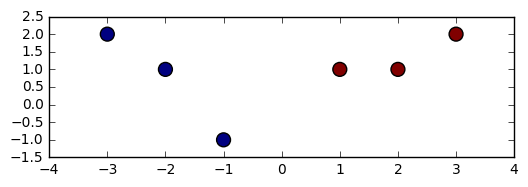

In [15]:
# QDA
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[-1, -1], [-2,1], [-3,2],[1,1], [2,1], [3,2]])
y = np.array([1,1,1,2,2,2])
plt. scatter(X.T[0], X.T[1], c = y, s = 100)
plt.show()

In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(x,y)

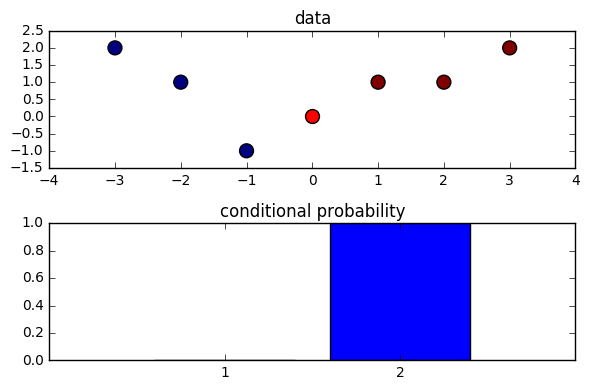

In [18]:
x = [[0, 0]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100)
plt.scatter(x[0][0], x[0][1], c='r', s=100)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p, align="center")
plt.title("conditional probability")
plt.axis([0, 3, 0, 1])
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [20]:
news = fetch_20newsgroups(subset="all")
model = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('nb', MultinomialNB()),
])
model.fit(news.data, news.target)

x = news.data[:1]
y = model.predict(x)[0]

No handlers could be found for logger "sklearn.datasets.twenty_newsgroups"


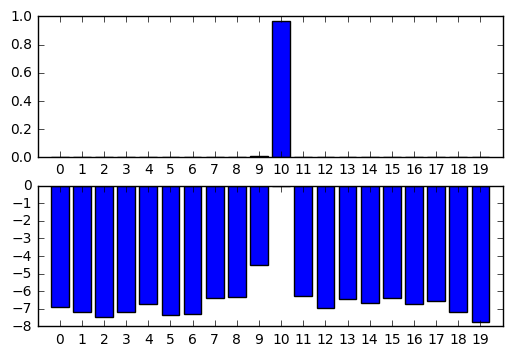

In [21]:
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(x)[0], align="center")
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(x)[0], align="center")
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.show()


In [22]:
# multi-class
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
model = LogisticRegression().fit(iris.data, iris.target)

In [23]:
from sklearn.metrics import roc_curve
fpr0, tpr0, thresholds0 = roc_curve(iris.target, model.decision_function(iris.data)[:, 0], pos_label=0)
fpr1, tpr1, thresholds1 = roc_curve(iris.target, model.decision_function(iris.data)[:, 1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(iris.target, model.decision_function(iris.data)[:, 2], pos_label=2)

In [24]:
fpr0, tpr0, thresholds0

(array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.67,  0.69,  1.  ]),
 array([ 0.02,  0.66,  0.72,  1.  ,  1.  ,  1.  ,  1.  ]),
 array([  5.59733959,   3.37153515,   3.33294961,   2.24452558,
         -6.84259428,  -6.87415927, -10.71530334]))